In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
import seaborn as sns
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import time

In [2]:
dfb = pd.read_csv("C:/Users/User/Documents/Python Scripts/DataDNA.csv")

In [3]:
dfb.head()
dfb.shape

,fe1,fe2,fe3,fe4,fe5,fe6,fe7,fe8,fe9,fe10,...,fe49,fe50,fe51,fe52,fe53,fe54,fe55,fe56,fe57,outcome
0,1,2,1,2,1,2,3,3,3,3,...,3,2,3,4,2,2,2,2,1,1
1,3,3,4,2,1,2,2,4,3,2,...,1,4,3,4,4,4,1,3,4,1
2,4,1,4,4,4,4,1,1,2,1,...,1,2,1,1,4,2,2,4,4,1
3,1,4,1,1,3,3,4,4,3,4,...,1,3,3,4,1,3,3,4,2,-1
4,3,4,4,3,1,1,4,4,4,1,...,3,1,3,2,1,4,2,1,1,-1


(2200, 58)

# Checking Class Variation

% of passanger with outcome 1 in train dataset:  51.68181818181818
% of passanger with outcome -1 in train dataset:  48.31818181818182


Text(0.5,1,'Count of Outcome')

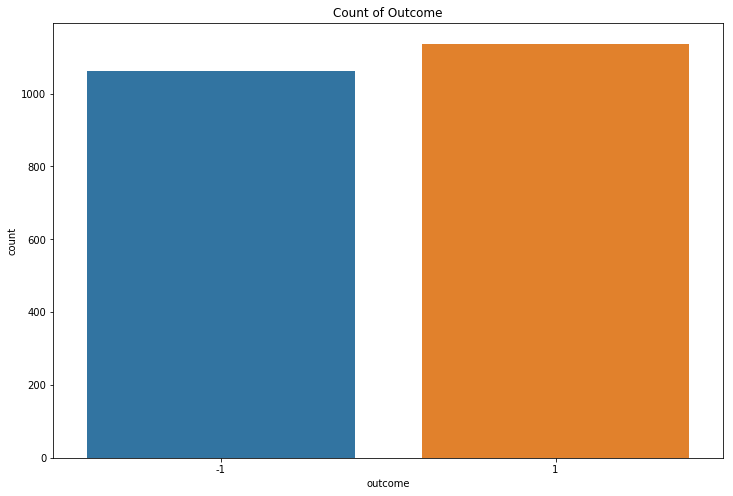

In [4]:
n=len(dfb)
surv_0=len(dfb[dfb['outcome']==-1])
surv_1=len(dfb[dfb['outcome']==1])

print("% of passanger with outcome 1 in train dataset: ",surv_1*100/n)
print("% of passanger with outcome -1 in train dataset: ",surv_0*100/n)


fig , ax = plt.subplots(figsize=(12,8))
sns.countplot(x='outcome', data=dfb)
plt.title("Count of Outcome")
plt.show()

# Checking correlation 

In [5]:
cor=dfb.corr()

Text(0.5,1,'Correlation Plot')

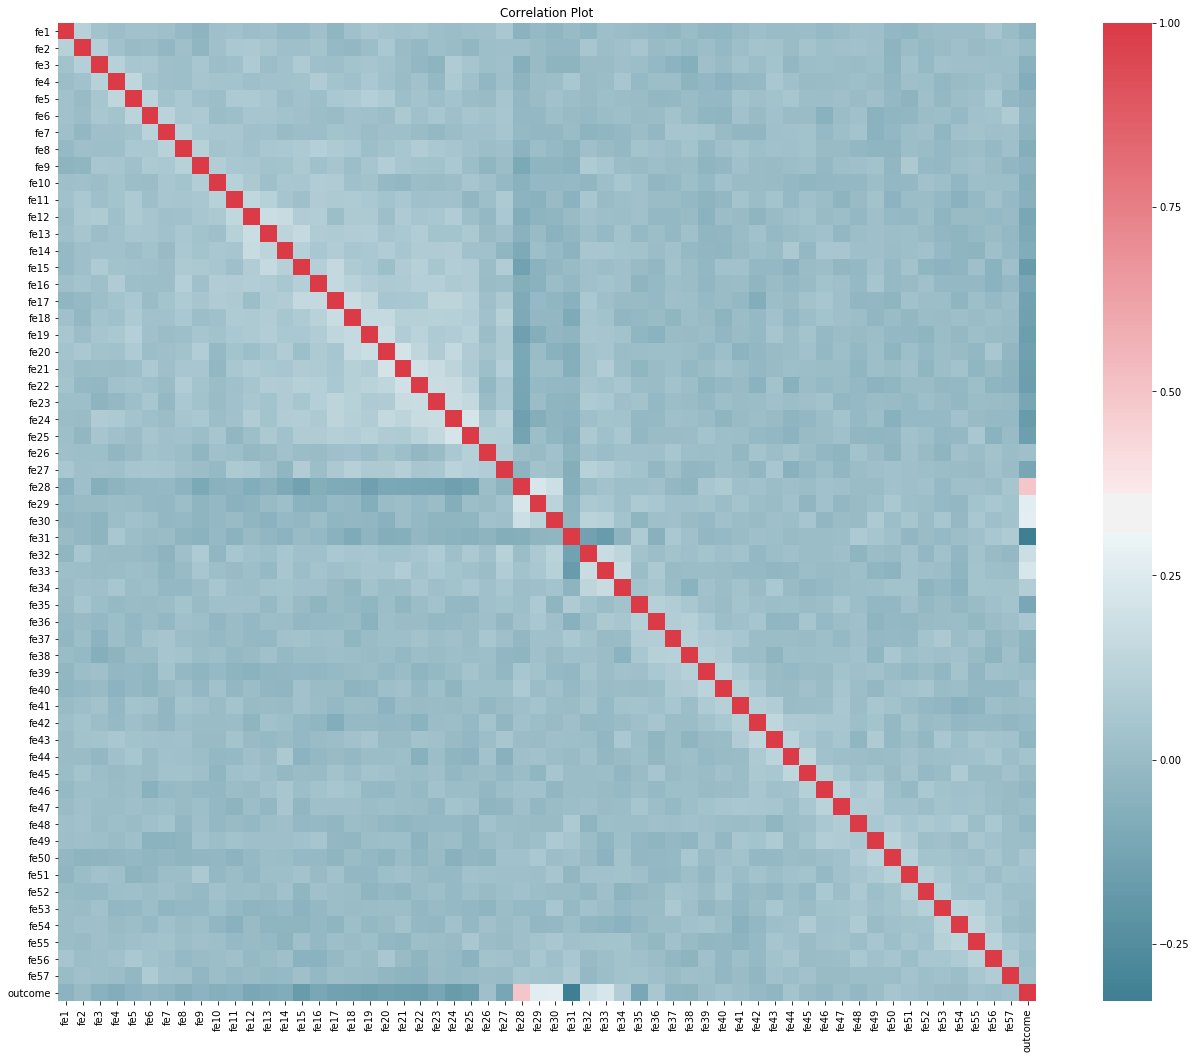

In [6]:
fig, ax =plt.subplots(figsize=(24, 18))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

# Normalizing fe1-fe57

In [7]:
z_normalized = stats.zscore(dfb.iloc[:,0:57])
df = pd.DataFrame(z_normalized)
df.shape
df.head(5)

(2200, 57)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-1.352898,-0.487479,-1.372441,-0.470994,-1.431156,-0.448281,0.405564,0.415676,0.396645,0.392611,...,1.424712,0.453914,-0.464630,0.513026,1.383572,-0.452656,-0.400135,-0.458416,-0.417566,-1.392249
1,0.459203,0.433082,1.360021,-0.470994,-1.431156,-0.448281,-0.495689,1.322008,0.396645,-0.509943,...,0.490475,-1.356803,1.404083,0.513026,1.383572,1.424521,1.435731,-1.374415,0.497419,1.369651
2,1.365253,-1.408039,1.360021,1.317075,1.342890,1.371309,-1.396943,-1.396986,-0.491065,-1.412496,...,-1.378000,-1.356803,-0.464630,-1.316240,-1.376046,1.424521,-0.400135,-0.458416,1.412405,1.369651
3,-1.352898,1.353642,-1.372441,-1.365028,0.418208,0.461514,1.306817,1.322008,0.396645,1.295164,...,-0.443763,-1.356803,0.469726,0.513026,1.383572,-1.391244,0.517798,0.457583,1.412405,-0.471615
4,0.459203,1.353642,1.360021,0.423041,-1.431156,-1.358075,1.306817,1.322008,1.284354,-1.412496,...,1.424712,0.453914,-1.398986,0.513026,-0.456173,-1.391244,1.435731,-0.458416,-1.332552,-1.392249


In [8]:
##### Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(dfb['outcome'])


# Setting features (57)
features= df

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

features.shape
labels.shape

(2200, 57)

(2200,)

# Data Set Split 70/30 (training / test)

In [9]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3,
                                                                           random_state = 42)

In [10]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1540, 57)
Training Labels Shape: (1540,)
Testing Features Shape: (660, 57)
Testing Labels Shape: (660,)


# Question 2 Part 3 Task A

## Classifier 1 : KNN

### Make Predictions on Test Data

## Classifier 2 : SVM

### Make Predictions on Test Data

## Classifier 3 : Training Forest

In [11]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate model 
rf = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [15,20,14],
    'criterion' :['gini', 'entropy'],
    'bootstrap': [True,False]
}

# Train the model on training data using GridSearch
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rfc.fit(train_features, train_labels)


#Grid Search Best Parameters
CV_rfc.best_params_

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [15, 20, 14], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'n_estimators': 500}

In [12]:
#Initiate the model with GridSearch Parameters

rf_grid = RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_depth = 15, max_features= 'log2',
                                 bootstrap=False,random_state=43)

# Train the model on training data
start = time.time()
rf_grid.fit(train_features, train_labels)
end = time.time()

print("training time:", round(end - start, 3),"s") # the time would be round to 3 decimal in seconds


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

training time: 1.597 s


### Make Predictions on Test Data

In [13]:
# Use the forest's predict method on the test data
start = time.time()
predictions=rf_grid.predict(test_features)
end = time.time()

print("test time:", round(end - start, 3),"s") # the time would be round to 3 decimal in seconds

test time: 0.115 s


In [14]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy based on 57 Features:",round(metrics.accuracy_score(test_labels, predictions),4))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision based on 57 Features:",round(metrics.precision_score(test_labels, predictions),3))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall based on 57 Features:",round(metrics.recall_score(test_labels, predictions),3))

Accuracy based on 57 Features: 0.9697
Precision based on 57 Features: 0.978
Recall based on 57 Features: 0.96


## Classifier 4: Training Neural Network

In [40]:
# Import the model we are using
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV

parameters = {
    'solver': ['lbfgs'], 
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'max_iter': [100,200], 
    'alpha': 10.0 ** -np.arange(1, 10), 
    'hidden_layer_sizes': (np.arange(1, 7),np.arange(1, 7),np.arange(1, 7)), 
    'random_state':[0,1,2,3,4,5,6,7,8,9]
}

# Train the model on training data using GridSearch
clf_grid = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)
clf_grid.fit(train_features, train_labels)


#Grid Search Best Parameters
clf_grid.best_params_

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'solver': ['lbfgs'], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'max_iter': [100, 200], 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]), 'hidden_layer_sizes': (array([1, 2, 3, 4, 5, 6]), array([1, 2, 3, 4, 5, 6]), array([1, 2, 3, 4, 5, 6])), 'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=Non

{'activation': 'identity',
 'alpha': 0.0001,
 'hidden_layer_sizes': array([1, 2, 3, 4, 5, 6]),
 'max_iter': 200,
 'random_state': 2,
 'solver': 'lbfgs'}

In [42]:
#Initiate the model with GridSearch Parameters
start_nu = time.time()
nu = neural_network.MLPClassifier(alpha=0.0001, hidden_layer_sizes = (np.arange(1, 6)), 
                                  max_iter=200, random_state=2, solver='lbfgs',activation='identity')

# Train the model on training data
nu.fit(train_features, train_labels)
end_nu = time.time()

print("train time:", round(end_nu - start_nu, 3),"s") # the time would be round to 3 decimal in seconds

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=array([1, 2, 3, 4, 5]), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

train time: 0.115 s


### Testing Model on Test Data

In [43]:
start_nu = time.time()
neural_predictions=0
neural_predictions = nu.predict(test_features)
end_nu = time.time()


print("test time:", round(end_nu - start_nu, 3),"s") # the time would be round to 3 decimal in seconds

test time: 0.001 s


In [44]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, neural_predictions))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(test_labels, neural_predictions))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(test_labels, neural_predictions))

Accuracy: 0.8424242424242424
Precision: 0.8369230769230769
Recall: 0.8421052631578947


# Question 2 Part 3 Task B

## 5th Classifier (Variation of Random Forest) 
Perform a greater param grid search.

Perform parameter selection on a wider range using GridSearchCV and monitor accuracy based on that, enabling boosting.

I will also find out the feature importance and check accuracy just on those features performing gridsearch using those features alone.

### Feature Importance from Random Forest Model from Task A

In [19]:
# Get numerical feature importances
importances = list(rf_grid.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable:                   27 Importance: 0.14
Variable:                   28 Importance: 0.12
Variable:                   30 Importance: 0.08
Variable:                   29 Importance: 0.07
Variable:                   26 Importance: 0.04
Variable:                   31 Importance: 0.03
Variable:                   32 Importance: 0.03
Variable:                   33 Importance: 0.03
Variable:                   14 Importance: 0.02
Variable:                   20 Importance: 0.02
Variable:                   21 Importance: 0.02
Variable:                   23 Importance: 0.02
Variable:                   24 Importance: 0.02
Variable:                    0 Importance: 0.01
Variable:                    1 Importance: 0.01
Variable:                    2 Importance: 0.01
Variable:                    3 Importance: 0.01
Variable:                    4 Importance: 0.01
Variable:                    5 Importance: 0.01
Variable:                    6 Importance: 0.01
Variable:                    7 Importanc

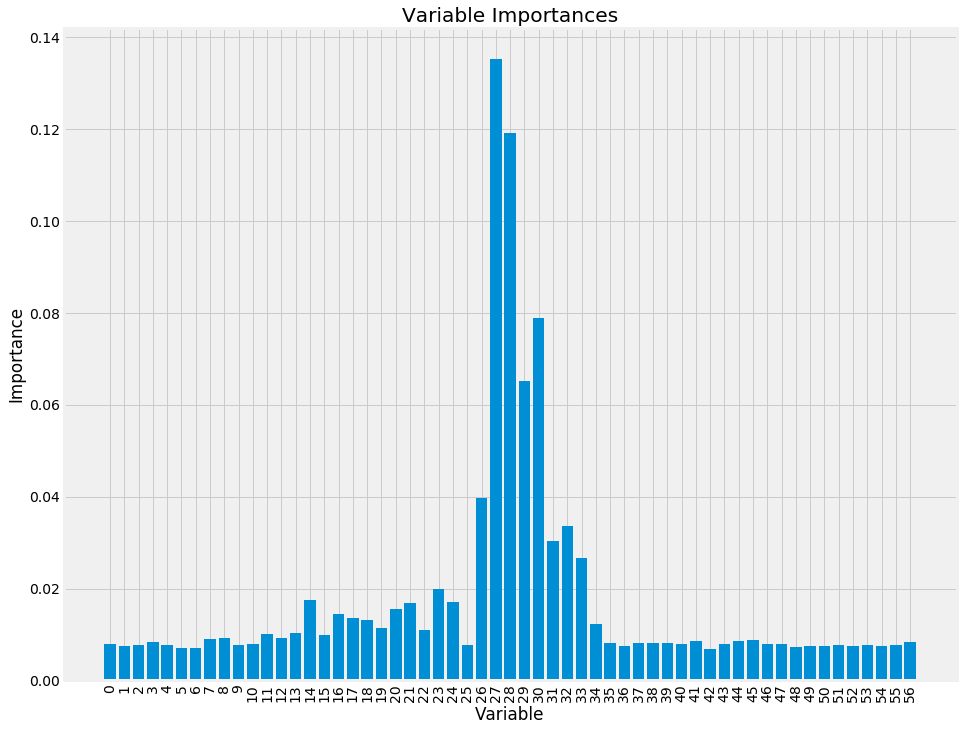

In [20]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(16,12))

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 


In [21]:
# New random forest with only the 11 most important variables using Parameters from Previous Part 3 A.
rf_most_important = RandomForestClassifier(random_state=43,n_estimators = 1000, criterion = 'gini', max_depth = 15, max_features= 'log2',bootstrap=False)

# Extract the  most important features
important_indices = [feature_list.index(27), feature_list.index(28),feature_list.index(30),feature_list.index(29),
                    feature_list.index(26),feature_list.index(31),feature_list.index(32),feature_list.index(33),
                    feature_list.index(21),feature_list.index(23),feature_list.index(24)
                    ]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
important_indices
test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)


# Make predictions and determine the error
prediction_imp = rf_most_important.predict(test_important)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy based on Task 3 A Model using 11 Important Features:",round(metrics.accuracy_score(test_labels, prediction_imp),3))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision based on Task 3 A Model using 11 Important Features:",round(metrics.precision_score(test_labels, prediction_imp),3))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall based on Task A Model using 11 Important Features:",round(metrics.recall_score(test_labels, prediction_imp),3))

[27, 28, 30, 29, 26, 31, 32, 33, 21, 23, 24]

array([[ 0.01576221, -0.31813363,  0.9423992 , ...,  0.34660748,
         1.24280017,  0.29507222],
       [-0.85115924, -1.44881858, -0.77673698, ..., -0.56551747,
        -0.57815246, -0.60031934],
       [ 1.7496051 ,  0.81255132, -1.63630507, ...,  0.34660748,
        -1.48862878,  0.29507222],
       ...,
       [ 0.88268365,  0.81255132,  0.9423992 , ..., -1.47764242,
         1.24280017,  1.19046377],
       [ 0.01576221, -1.44881858,  0.9423992 , ...,  0.34660748,
         1.24280017, -0.60031934],
       [ 1.7496051 , -0.31813363, -0.77673698, ...,  1.25873243,
         1.24280017, -0.60031934]])

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

Accuracy based on Task 3 A Model using 11 Important Features: 0.961
Precision based on Task 3 A Model using 11 Important Features: 0.977
Recall based on Task A Model using 11 Important Features: 0.941


### Note
Using the top 11 features and training the previous model from Task 3 A we got an accuracy of 96%. We will now use these important features and find out a tree that will BEST work on it and try get a better accuracy from the previous 96.9% that used all the features.

### Using important features ONLY and applying GridSearch to find best parameters to train & test Random Forest on

In [22]:
# Instantiate model 
rf = RandomForestClassifier(random_state=44)

param_grid = { 
    'n_estimators': [500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [15,14,17,21],
    'criterion' :['gini', 'entropy'],
    'bootstrap': [True,False]
}

# Train the model on training data using GridSearch
CV_rfc_imp = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rfc_imp.fit(train_important, train_labels)


#Grid Search Best Parameters
CV_rfc_imp.best_params_

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=44, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [15, 14, 17, 21], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 1000}

In [53]:
#Initiate the model with GridSearch Parameters

rf_grid_imp = RandomForestClassifier(n_estimators = 1000,criterion = 'gini', max_depth = 15, 
                                     max_features= 'auto',bootstrap=True,random_state=45)

# Train the model on training data
start = time.time()
rf_grid_imp.fit(train_features, train_labels)
end = time.time()

print("training time:", round(end - start, 3),"s") # the time would be round to 3 decimal in seconds


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

training time: 2.994 s


In [54]:
# Use the forest's predict method on the test data
start = time.time()
predictions_important=rf_grid_imp.predict(test_features)
end = time.time()

print("test time:", round(end - start, 3),"s") # the time would be round to 3 decimal in seconds

test time: 0.281 s


In [55]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy based on Classifier 5 using 11 Important Features from task 3A:",round(metrics.accuracy_score(test_labels, predictions_important),3))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision based on Classifier 5 based on 11 Important Features Ifrom task 3A:",round(metrics.precision_score(test_labels, predictions_important),3))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall based on Classifier 5 based on 11 Important Features from task 3A:",round(metrics.recall_score(test_labels, predictions_important),3))

Accuracy based on Classifier 5 using 11 Important Features from task 3A: 0.974
Precision based on Classifier 5 based on 11 Important Features Ifrom task 3A: 0.987
Recall based on Classifier 5 based on 11 Important Features from task 3A: 0.96


### Conclusion for using classifier 5

#### Using 57 Features:
##### RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_depth = 15, max_features= 'log2',bootstrap=False)
1. Accuracy based on 57 Features: 0.9697
2. Precision based on 57 Features: 0.978
3. Recall based on 57 Features: 0.96

#### Using 11 Features with Classifier 5:
##### RandomForestClassifier(n_estimators = 500,criterion = 'gini', max_depth = 15,  max_features= 'auto',bootstrap=True,random_state=43)
1. Accuracy based on Classifier 5 using 11 Important Features from task 3A: 0.974
2. Precision based on Classifier 5 based on 11 Important Features Ifrom task 3A: 0.987
3. Recall based on Classifier 5 based on 11 Important Features from task 3A: 0.96

#### Conclusion
Using just 11 features and Bootstrap we were able to get a better result of using the Classifier 5 (variation of Random Forest).
The training time was also better from 2.063 to 1.462 on the training and from 0.11 to 0.10 on test set. A noticeable difference on such small data set.

### Visualizing a Single Decision Tree of Classifier 5

In [26]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf_grid_imp.estimators_[102]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png'); 

In [27]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 15


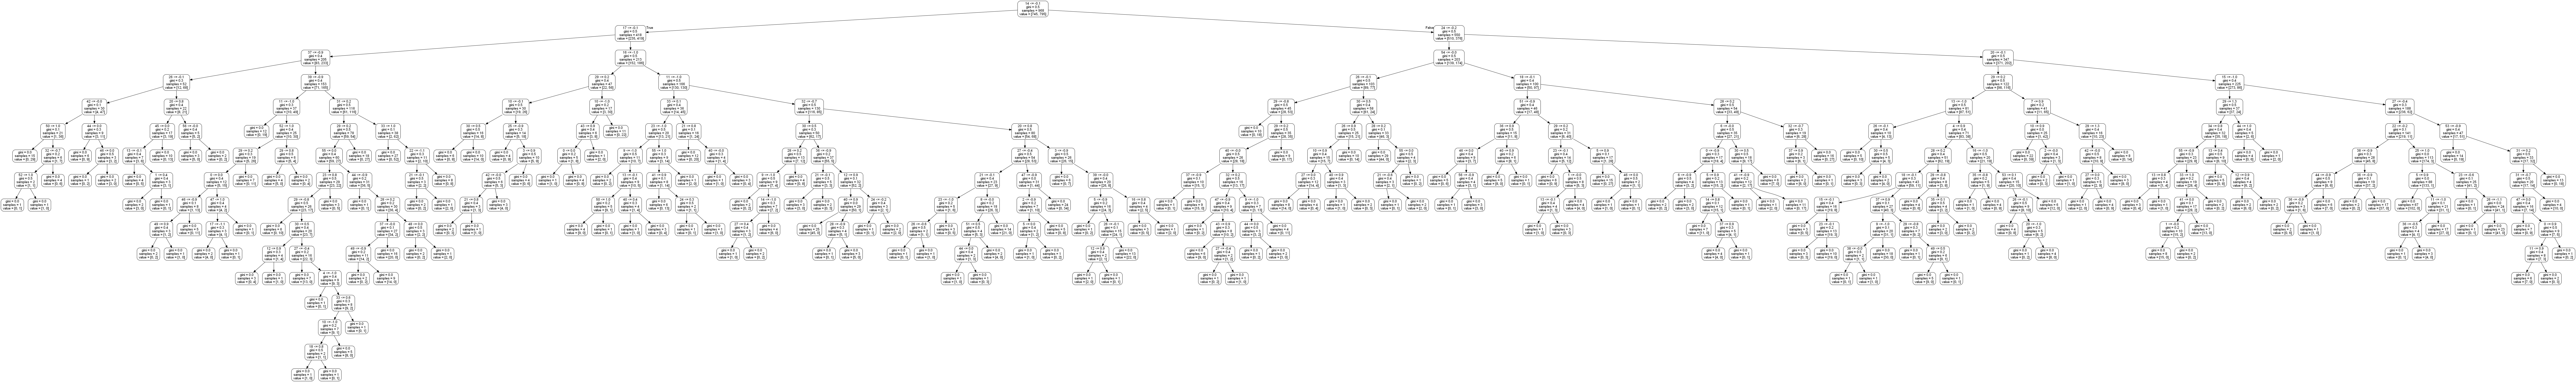

## 6th Classifier (Variation of Neural Network) 

consider a deeper neural networkwith multiple layers, use di erent optimization/solver algorithms, 

# Question 2 Part 3 Task C

### KNN (Classifier 1) Run 20 Times 

### SVM (Classifier 2) Run 20 Times 

### Random Forest (Classifier 3) Run 20 Times 

In [77]:
#Number of Runs set to N
N=20
training_time=[]
test_time=[]
accuracy_rf_recur=[]
precision_rf_recur=[]
recall_rf_recur=[]

#Training Data
rf_recur = RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_depth = 15, max_features= 'log2',
                                     bootstrap=False,random_state=43)

# Split the data into training and testing sets

for i in range(0,N):
    # Split the data into training and testing sets
    train_features_rf_recur, test_features_rf_recur, train_labels_rf_recur, test_labels_rf_recur = train_test_split(features, 
                                                                            labels, test_size = 0.3)
    
   

    # Train the model on training data
    rf_recur_start = time.time()
    #training
    rf_recur.fit(train_features_rf_recur, train_labels_rf_recur)
    
    rf_recur_end = time.time()
    training_time.append(round(rf_recur_end - rf_recur_start, 3))
    
 
    #Testing Data
    # Use the forest's predict method on the test data
    rf_test_start = time.time()
    
    #prediction
    rf_recur_prediction=rf_recur.predict(test_features_rf_recur)
    
    rf_test_end = time.time()
    test_time.append(round(rf_test_end - rf_test_start, 3))
    
    #Storing Accuracies
    # Model Accuracy: how often is the classifier correct?
    accuracy_rf_recur.append(round(metrics.accuracy_score(test_labels_rf_recur, rf_recur_prediction),4))
    
    # Model Precision: what percentage of positive tuples are labeled as such?
    precision_rf_recur.append(round(metrics.precision_score(test_labels_rf_recur, rf_recur_prediction),3))

    # Model Recall: what percentage of positive tuples are labelled as such?
    recall_rf_recur.append(round(metrics.recall_score(test_labels_rf_recur, rf_recur_prediction),3))
    
mean_acc=np.mean(accuracy_rf_recur)
mean_prec=np.mean(precision_rf_recur)
mean_rec=np.mean(recall_rf_recur)

avg_test=np.mean(test_time)
avg_train=np.mean(training_time)


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)

In [78]:
print("Average Mean of Accuracies of Random Forest is:  %g" % round(mean_acc,3),"With %g Iterations" % N)

print("Average Mean of Precision of Random Forest is:  %g" % round(mean_prec,3),"With %g Iterations" % N)

print("Average Mean of Recall of Random Forest is:  %g" % round(mean_rec,3),"With %g Iterations" % N)

print("Average Mean of Training Time of Random Forest is:  %g" % round(avg_train,3),"With %g Iterations" % N)
print("Average Mean of Test Time of Random Forest is:  %g" % round(avg_test,3),"With %g Iterations" % N)

Average Mean of Accuracies of Random Forest is:  0.968 With 20 Iterations
Average Mean of Precision of Random Forest is:  0.981 With 20 Iterations
Average Mean of Recall of Random Forest is:  0.957 With 20 Iterations
Average Mean of Training Time of Random Forest is:  1.895 With 20 Iterations
Average Mean of Test Time of Random Forest is:  0.129 With 20 Iterations


### Neural Network Classifier 4 (Run 20 times)

In [79]:
#Number of Runs set to N
N=20
training_time_nu=[]
test_time_nu=[]
accuracy_nu_recur=[]
precision_nu_recur=[]
recall_nu_recur=[]

#Training Data
nu_recur = neural_network.MLPClassifier(alpha=0.01, hidden_layer_sizes =(10,10,5), 
                                  max_iter=100, random_state=3, solver='lbfgs',activation='relu')


# Split the data into training and testing sets

for i in range(0,N):
    # Split the data into training and testing sets
    train_features_nu_recur, test_features_nu_recur, train_labels_nu_recur, test_labels_nu_recur = train_test_split(features, 
                                                                            labels, test_size = 0.3)
    
    # Train the model on training data
    nu_recur_start = time.time()
    #training
    nu_recur.fit(train_features_nu_recur, train_labels_nu_recur)
    
    nu_recur_end = time.time()
    training_time_nu.append(round(nu_recur_end - nu_recur_start, 3))
    
 
    #Testing Data
    # Use the forest's predict method on the test data
    nu_test_start = time.time()
    
    #prediction
    nu_recur_prediction=nu_recur.predict(test_features_nu_recur)
    
    nu_test_end = time.time()
    test_time_nu.append(round(nu_test_end - nu_test_start, 3))
    
    #Storing Accuracies
    # Model Accuracy: how often is the classifier correct?
    accuracy_nu_recur.append(round(metrics.accuracy_score(test_labels_nu_recur, nu_recur_prediction),4))
    
    # Model Precision: what percentage of positive tuples are labeled as such?
    precision_nu_recur.append(round(metrics.precision_score(test_labels_nu_recur, nu_recur_prediction),3))

    # Model Recall: what percentage of positive tuples are labelled as such?
    recall_nu_recur.append(round(metrics.recall_score(test_labels_nu_recur, nu_recur_prediction),3))
    
mean_acc_nu=np.mean(accuracy_nu_recur)
mean_prec_nu=np.mean(precision_nu_recur)
mean_rec_nu=np.mean(recall_nu_recur)

avg_test_nu=np.mean(test_time_nu)
avg_train_nu=np.mean(training_time_nu)


MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [80]:
print("Average Mean of Accuracies of Neural Network is:  %g" % round(mean_acc_nu,3),"With %g Iterations" % N)

print("Average Mean of Precision of Neural Network is:  %g" % round(mean_prec_nu,3),"With %g Iterations" % N)

print("Average Mean of Recall of Neural Network is:  %g" % round(mean_rec_nu,3),"With %g Iterations" % N)

print("Average Mean of Training Time of Neural Network is:  %g" % round(avg_test_nu,3),"With %g Iterations" % N)
print("Average Mean of Test Time of Neural Network is:  %g" % round(avg_train_nu,3),"With %g Iterations" % N)

Average Mean of Accuracies of Neural Network is:  0.887 With 20 Iterations
Average Mean of Precision of Neural Network is:  0.897 With 20 Iterations
Average Mean of Recall of Neural Network is:  0.883 With 20 Iterations
Average Mean of Training Time of Neural Network is:  0.002 With 20 Iterations
Average Mean of Test Time of Neural Network is:  0.287 With 20 Iterations


### Random Forest (Important Features) Classifier 5 (Run 20 times)

In [84]:
#rffmber of Runs set to N
N=20
training_time_rff=[]
test_time_rff=[]
accuracy_rff_recur=[]
precision_rff_recur=[]
recall_rff_recur=[]

#Training Data
rff_recur = RandomForestClassifier(n_estimators = 1000,criterion = 'gini', max_depth = 15, 
                                     max_features= 'auto',bootstrap=True,random_state=45)
    
# Split the data into training and testing sets

for i in range(0,N):
    # Split the data into training and testing sets
    train_features_rff_recur, test_features_rff_recur, train_labels_rff_recur, test_labels_rff_recur = train_test_split(features, 
                                                                            labels, test_size = 0.3)
    
    train_important_rff = train_features_rff_recur[:, important_indices]
    test_important_rff = test_features_rff_recur[:, important_indices]
    
    
    
    # Train the model on training data
    rff_recur_start = time.time()
    #training
    rff_recur.fit(train_features_rff_recur, train_labels_rff_recur)
    
    rff_recur_end = time.time()
    training_time_rff.append(round(rff_recur_end - rff_recur_start, 3))
    
 
    #Testing Data
    # Use the forest's predict method on the test data
    rff_test_start = time.time()
    
    #prediction
    rff_recur_prediction=rff_recur.predict(test_features_rff_recur)
    
    rff_test_end = time.time()
    test_time_rff.append(round(rff_test_end - rff_test_start, 3))
    
    #Storing Accuracies
    # Model Accuracy: how often is the classifier correct?
    accuracy_rff_recur.append(round(metrics.accuracy_score(test_labels_rff_recur, rff_recur_prediction),4))
    print(round(metrics.accuracy_score(test_labels_rff_recur, rff_recur_prediction),4))
    
    # Model Precision: what percentage of positive tuples are labeled as such?
    precision_rff_recur.append(round(metrics.precision_score(test_labels_rff_recur, rff_recur_prediction),3))

    # Model Recall: what percentage of positive tuples are labelled as such?
    recall_rff_recur.append(round(metrics.recall_score(test_labels_rff_recur, rff_recur_prediction),3))
    
mean_acc_rff=np.mean(accuracy_rff_recur)
mean_prec_rff=np.mean(precision_rff_recur)
mean_rec_rff=np.mean(recall_rff_recur)

avg_test_rff=np.mean(test_time_rff)
avg_train_rff=np.mean(training_time_rff)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9712


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9712


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9652


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9758


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9682


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9697


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9758


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9697


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9773


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9727


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9621


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9773


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9697


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9758


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9758


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9652


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9636


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9712


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9667


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

0.9727


In [85]:
print("Average Mean of Accuracies of Random Forest (With Imp Feature) is:  %g" % round(mean_acc_rff,4),"With %g Iterations" % N)

print("Average Mean of Precision of Random Forest (With Imp Feature) is:  %g" % round(mean_prec_rff,3),"With %g Iterations" % N)

print("Average Mean of Recall of Random Forest (With Imp Feature) is:  %g" % round(mean_rec_rff,3),"With %g Iterations" % N)

print("Average Mean of Training Time of Random Forest (With Imp Feature) is:  %g" % round(avg_test_rff,3),"With %g Iterations" % N)
print("Average Mean of Test Time of Random Forest (With Imp Feature) is:  %g" % round(avg_train_rff,3),"With %g Iterations" % N)

Average Mean of Accuracies of Random Forest (With Imp Feature) is:  0.9708 With 20 Iterations
Average Mean of Precision of Random Forest (With Imp Feature) is:  0.985 With 20 Iterations
Average Mean of Recall of Random Forest (With Imp Feature) is:  0.958 With 20 Iterations
Average Mean of Training Time of Random Forest (With Imp Feature) is:  0.195 With 20 Iterations
Average Mean of Test Time of Random Forest (With Imp Feature) is:  3.129 With 20 Iterations


### Neural Network (Variation) Classifier 6 (Run 20 times)